<a href="https://colab.research.google.com/github/Adarshit007/Brazilian_E_com/blob/main/Python_brazil_ecom_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Information**

This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced.


# **1. Download the dataset. Read all the files as pandas dataframes. Display basic Information**

In [43]:
import pandas as pd
import requests
import io
import zipfile

input_path="https://raw.githubusercontent.com/Adarshit007/Brazilian_E_com/main/"
df_item=pd.read_csv(input_path+"olist_order_items_dataset.csv")
df_reviews=pd.read_csv(input_path+"olist_order_reviews_dataset.csv")
df_orders=pd.read_csv(input_path+"olist_orders_dataset.csv")
df_products=pd.read_csv(input_path+"olist_products_dataset.csv")

# Handle df_geolocation separately due to nested zip file structure
geolocation_zip_url = input_path + "olist_geolocation_dataset.zip"
response = requests.get(geolocation_zip_url)
response.raise_for_status()  # Raise an exception for HTTP errors

with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # Specify the full path to the CSV file within the zip archive
    with z.open('olist_geolocation_dataset/olist_geolocation_dataset.csv') as f:
        df_geolocation = pd.read_csv(f)

df_sellers=pd.read_csv(input_path+"olist_sellers_dataset.csv")
df_order_pay=pd.read_csv(input_path+"olist_order_payments_dataset.csv")
df_customers=pd.read_csv(input_path+"olist_customers_dataset.csv")
df_category=pd.read_csv(input_path+"product_category_name_translation.csv")

In [44]:
print(df_item.shape)
print(df_reviews.shape)
print(df_orders.shape)
print(df_products.shape)
print(df_geolocation.shape)
print(df_sellers.shape)
print(df_order_pay.shape)
print(df_customers.shape)
print(df_category.shape)

(112650, 7)
(100000, 7)
(99441, 8)
(32951, 9)
(1000163, 5)
(3095, 4)
(103886, 5)
(99441, 5)
(71, 2)


# **Look the schema below and Create the full DataFrame using joins. Olist_order_dataset is the main dataset. Join the rest of the tables ti this table, Skip merging olist_geolocation_dataset.csv. the shape of the final table will bw (119151,39) **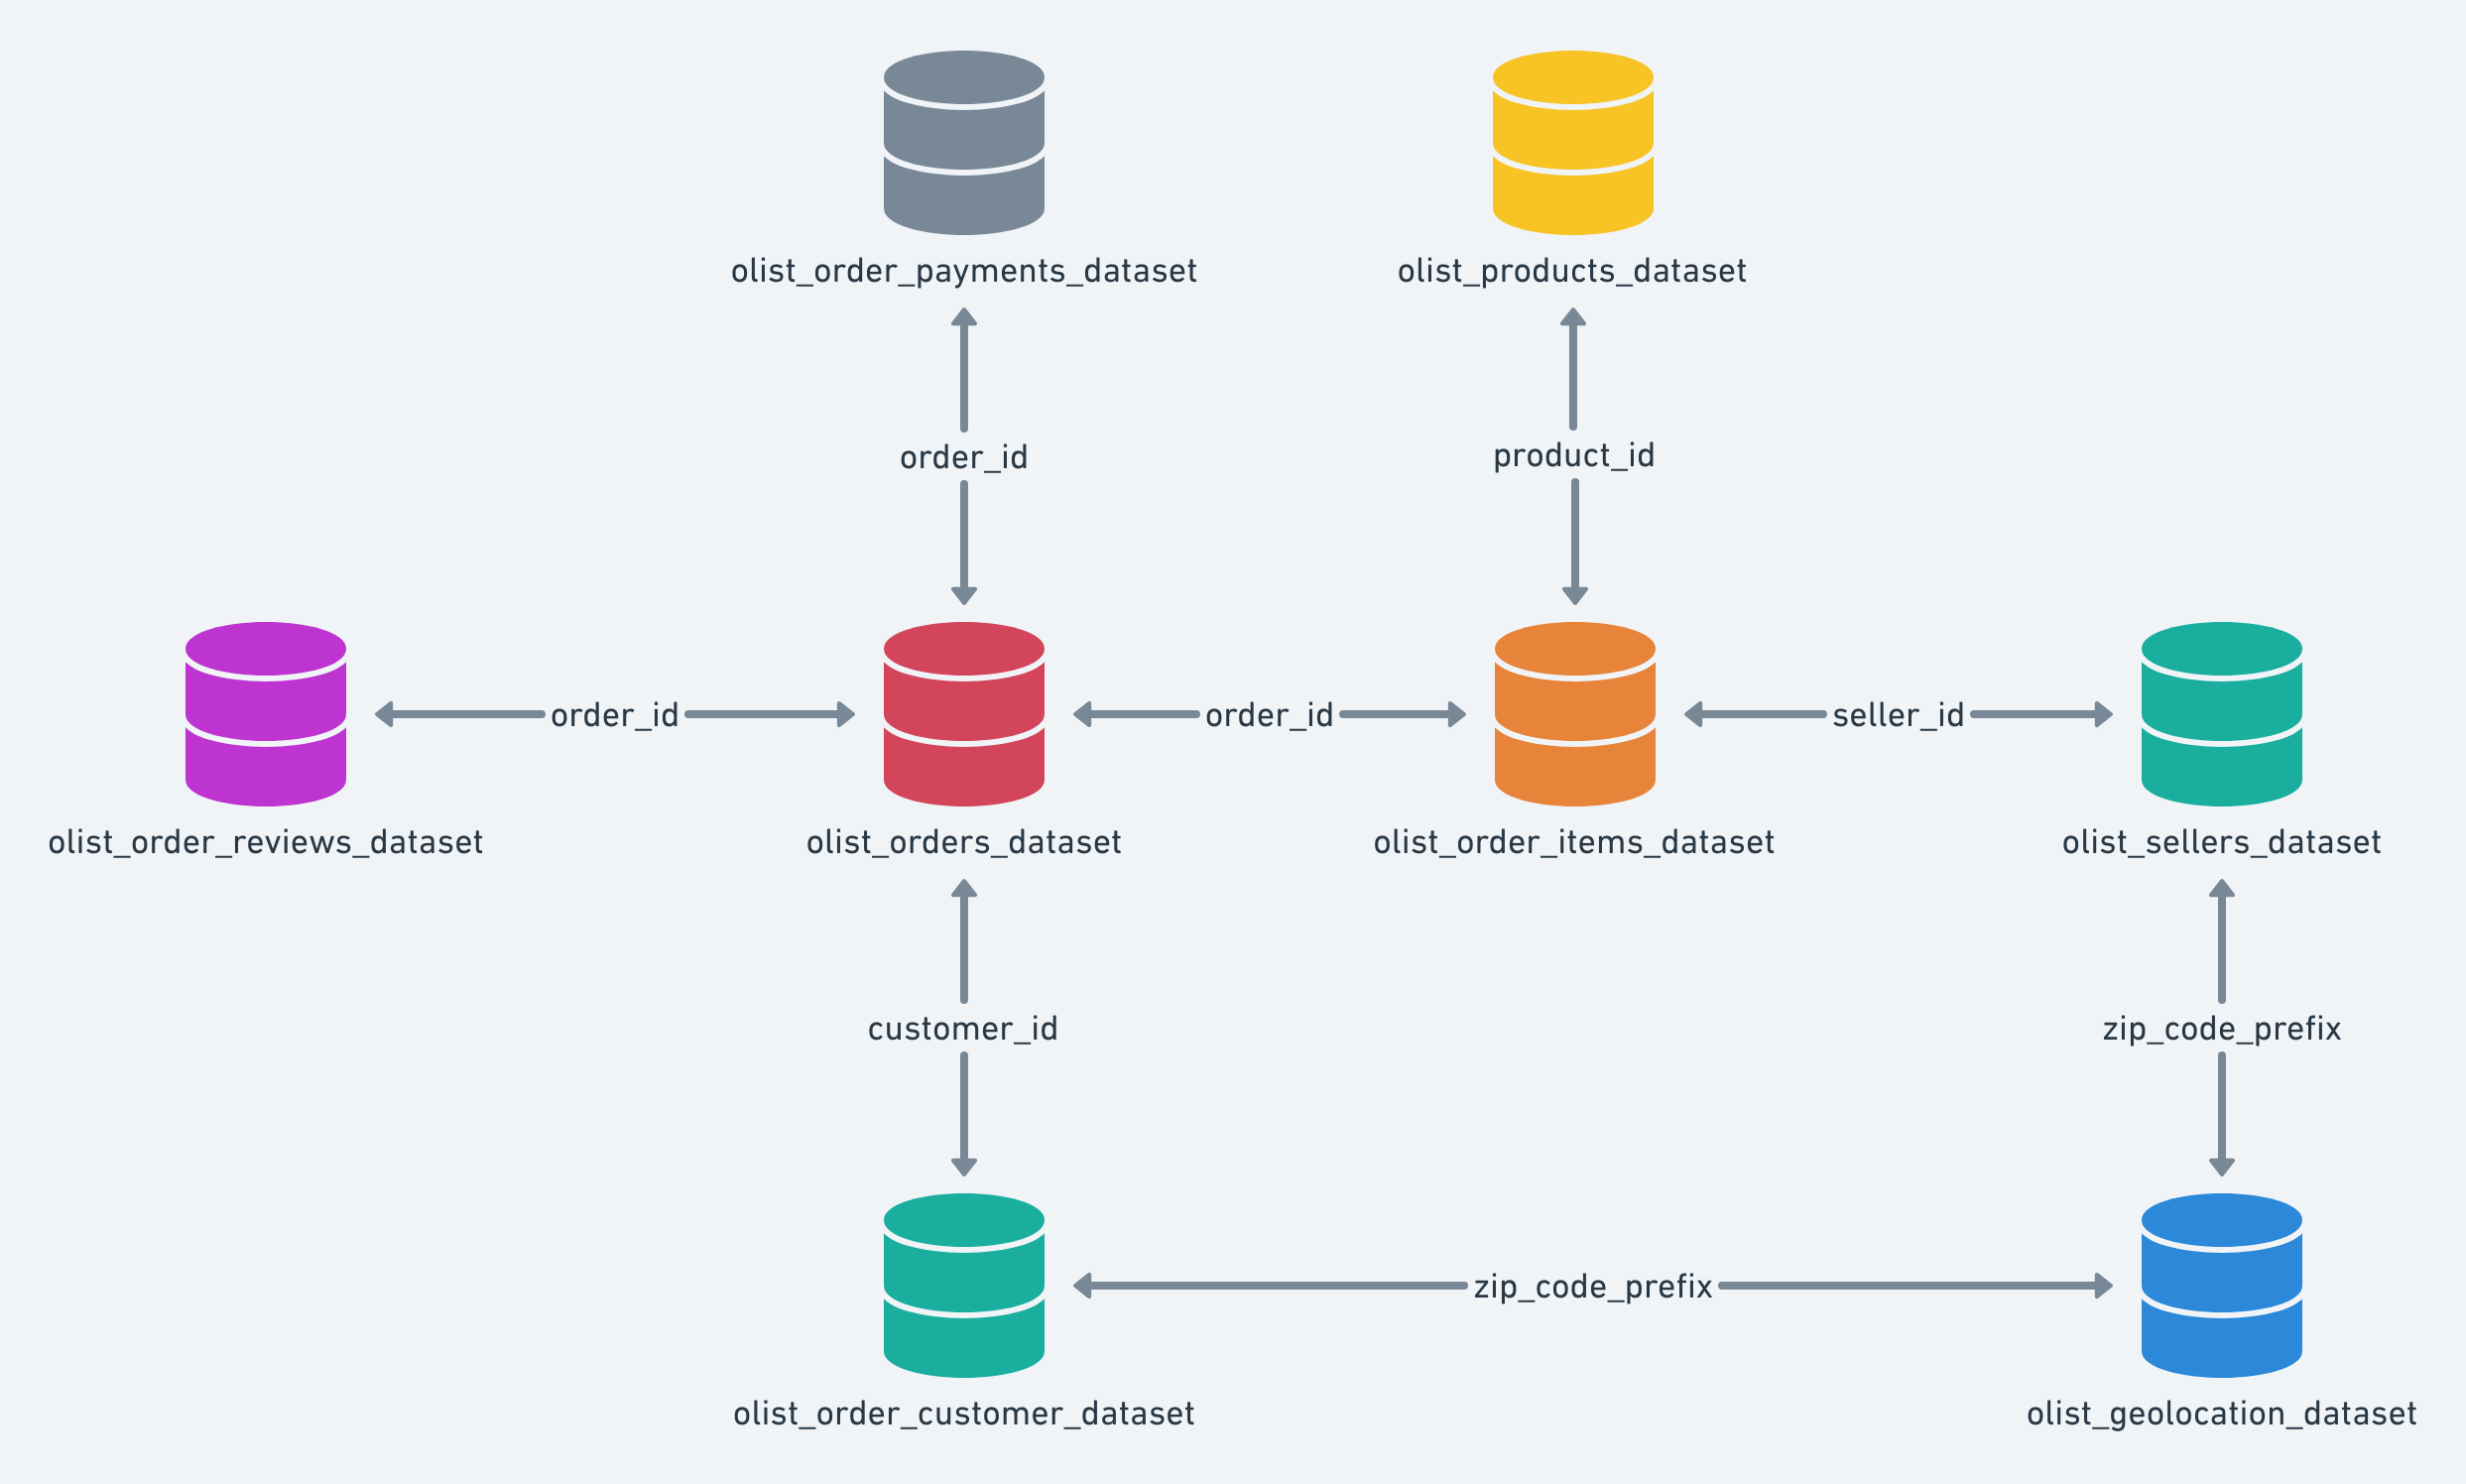

In [46]:
# Merge the dataframes(skipping the  geo locations) according to the schema and print basic info


In [47]:
print('df_orders',df_orders.shape)
df_full=pd.merge(df_orders,df_item,on='order_id',how='left')
print('items_added',df_full.shape)
df_full=df_full.merge(df_order_pay,on='order_id',how='left')
print('order_pay added',df_full.shape)
df_full=df_full.merge(df_reviews,on='order_id',how='left')
print('order_reviews added',df_full.shape)
df_full=df_full.merge(df_products,on='product_id',how='left')
print('order_products added',df_full.shape)
df_full=df_full.merge(df_customers,on='customer_id',how='left')
print('order_sellers added',df_full.shape)
df_full=df_full.merge(df_sellers,on='seller_id',how='left')
print('order_sellers added',df_full.shape)

df_orders (99441, 8)
items_added (113425, 14)
order_pay added (118434, 18)
order_reviews added (119151, 24)
order_products added (119151, 32)
order_sellers added (119151, 36)
order_sellers added (119151, 39)


In [49]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119151 entries, 0 to 119150
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119151 non-null  object 
 1   customer_id                    119151 non-null  object 
 2   order_status                   119151 non-null  object 
 3   order_purchase_timestamp       119151 non-null  object 
 4   order_approved_at              118974 non-null  object 
 5   order_delivered_carrier_date   117065 non-null  object 
 6   order_delivered_customer_date  115730 non-null  object 
 7   order_estimated_delivery_date  119151 non-null  object 
 8   order_item_id                  118318 non-null  float64
 9   product_id                     118318 non-null  object 
 10  seller_id                      118318 non-null  object 
 11  shipping_limit_date            118318 non-null  object 
 12  price                         

# **3. Show the head() of the dataframe **

In [51]:
df_full.head(20).T

0   \
order_id                                        e481f51cbdc54678b7cc49136f2d6af7   
customer_id                                     9ef432eb6251297304e76186b10a928d   
order_status                                                           delivered   
order_purchase_timestamp                                     2017-10-02 10:56:33   
order_approved_at                                            2017-10-02 11:07:15   
order_delivered_carrier_date                                 2017-10-04 19:55:00   
order_delivered_customer_date                                2017-10-10 21:25:13   
order_estimated_delivery_date                                2017-10-18 00:00:00   
order_item_id                                                                1.0   
product_id                                      87285b34884572647811a353c7ac498a   
seller_id                                       3504c0cb71d7fa48d967e0e4c94d59d9   
shipping_limit_date                                          2017-10-06 11:07:15   
price                                                                      29.99   
freight_value                                                               8.72   
payment_sequential                                                           1.0   
payment_type                                                         credit_card   
payment_installments                                                         1.0   
payment_value                                                              18.12   
review_id                                       a54f0611adc9ed256b57ede6b6eb5114   
review_score                                                                   4   
review_comment_title                                                         NaN   
review_comment_message         Não testei o produto ainda, mas ele veio corre...   
review_creation_date                                         2017-10-11 00:00:00   
review_answer_timestamp                                      2017-10-12 03:43:48   
product_category_name                                      utilidades_domesticas   
product_name_lenght                                                         40.0   
product_description_lenght                                                 268.0   
product_photos_qty                                                           4.0   
product_weight_g                                                           500.0   
product_length_cm                                                           19.0   
product_height_cm                                                            8.0   
product_width_cm                                                            13.0   
customer_unique_id                              7c396fd4830fd04220f754e42b4e5bff   
customer_zip_code_prefix                                                    3149   
customer_city                                                          sao paulo   
customer_state                                                                SP   
seller_zip_code_prefix                                                    9350.0   
seller_city                                                                 maua   
seller_state                                                                  SP   

                                                                              1   \
order_id                                        e481f51cbdc54678b7cc49136f2d6af7   
customer_id                                     9ef432eb6251297304e76186b10a928d   
order_status                                                           delivered   
order_purchase_timestamp                                     2017-10-02 10:56:33   
order_approved_at                                            2017-10-02 11:07:15   
order_delivered_carrier_date                                 2017-10-04 19:55:00   
order_delivered_customer_date                                2017-10-10 21:25:13   
order_estimated_delivery_date                

# 4. use single line code to print the missng values and print the missing values and number of unique values in each column

In [53]:
df_full.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                             0
review_score                          0
review_comment_title             104962
review_comment_message            67901
review_creation_date                  0
review_answer_timestamp               0
product_category_name              2542
product_name_lenght                2542
product_description_lenght         2542
product_photos_qty                 2542
product_weight_g                    853
product_length_cm                   853
product_height_cm                   853
product_width_cm                    853
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
seller_zip_code_prefix              833
seller_city                         833
seller_state                        833
dtype: int64

In [ ]:
# single line code for unique values in each column
df_full.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
price                             5968
freight_value                     6999
payment_sequential                  29
payment_type                         5
payment_installments                24
payment_value                    29077
review_id                        99173
review_score                         5
review_comment_title              4600
review_comment_message           36921
review_creation_date               637
review_answer_timestamp          99010
product_category_name               73
product_name_lenght                 66
product_description_lenght        2960
product_photos_qty                  19
product_weight_g                  2204
product_length_cm                   99
product_height_cm                  102
product_width_cm                    95
customer_unique_id               96096
customer_zip_code_prefix         14994
customer_city                     4119
customer_state                      27
seller_zip_code_prefix            2246
seller_city                        611
seller_state                        23
dtype: int64

# 5. Use .iloc[] to select the first 8 columns and rows indices from 10000-12000.

In [54]:
# you are allowed to used iloc only
df_full.iloc[10000:12000,0:8]

order_id                       customer_id  \
10000  cdc1504eb9521a2941c00363ee8288d2  87e3b43896edfc6786a0d8ab36a14202   
10001  f49b0d1c77d2f8b37c7579f4cbc8264e  60084b7d470df61a877bc270cae7f70f   
10002  60cea07de0865aeead1984c1c97dee57  e31cc7a1dbedf7b8118bf23028475df4   
10003  fecadea4b60522702bd322933da20c9e  52949927b7bca40124954b070e2ccd44   
10004  9694aa09499321709cdb542840ebbbb2  18cf90f4d4f765bd1ca02c2af5e214ea   
...                                 ...                               ...   
11995  94b9fdffc1d9b49273c91598fc0dc5e6  6236a1fd73ab92114378e88fe16698ea   
11996  0c986e5002868d137f566b34fb183827  56a65a21f846976ecbc7b7958ff32f74   
11997  487cdbe6d900d62275117d1fd45674bf  1dc9dd1db9aebd0a3c03eefeb3f7ee1f   
11998  809a282bbd5dbcabb6f2f724fca862ec  622e13439d6b5a0b486c435618b2679e   
11999  c0cb4eb4f8b433eb1d73091276e12ebd  793206f0990570a0101ebb9558de79c3   

      order_status order_purchase_timestamp    order_approved_at  \
10000    delivered      2017-09-05 16:05:43  2017-09-07 02:55:57   
10001    delivered      2018-05-22 11:04:25  2018-05-22 11:37:11   
10002    delivered      2017-05-29 15:07:16  2017-05-29 15:22:43   
10003    delivered      2017-12-01 12:57:58  2017-12-02 02:51:04   
10004    delivered      2018-05-01 00:02:11  2018-05-01 03:53:50   
...            ...                      ...                  ...   
11995    delivered      2017-02-03 21:36:05  2017-02-03 21:50:13   
11996    delivered      2018-07-31 20:19:25  2018-08-01 02:35:21   
11997    delivered      2018-03-07 12:27:29  2018-03-07 12:49:52   
11998     canceled      2016-09-13 15:24:19  2016-10-07 13:16:46   
11999    delivered      2018-02-21 15:59:53  2018-02-21 16:15:59   

      order_delivered_carrier_date order_delivered_customer_date  \
10000          2017-09-15 23:13:04           2017-09-27 17:47:56   
10001          2018-05-23 12:51:00           2018-06-02 15:51:22   
10002          2017-06-01 10:56:44           2017-06-05 12:14:26   
10003          2017-12-06 00:07:16           2017-12-11 19:51:47   
10004          2018-05-03 12:31:00           2018-05-08 19:18:47   
...                            ...                           ...   
11995          2017-02-07 15:43:38           2017-02-15 18:18:11   
11996          2018-08-02 15:43:00           2018-08-03 14:26:27   
11997          2018-03-08 08:44:45           2018-03-28 20:08:27   
11998                          NaN                           NaN   
11999          2018-02-26 20:46:57           2018-03-14 12:12:19   

      order_estimated_delivery_date  
10000           2017-10-04 00:00:00  
10001           2018-06-06 00:00:00  
10002           2017-06-09 00:00:00  
10003           2017-12-28 00:00:00  
10004           2018-06-01 00:00:00  
...                             ...  
11995           2017-03-30 00:00:00  
11996           2018-08-14 00:00:00  
11997           2018-03-27 00:00:00  
11998           2016-09-30 00:00:00  
11999           2018-03-22 00:00:00  

[2000 rows x 8 columns]

#6. Use .loc[] to select firt 4 columns and rows  indices from 10000-12000

In [55]:
# you are allowed to use only .loc[]
df_full.loc[10000:12000, :'order_purchase_timestamp']

order_id                       customer_id  \
10000  cdc1504eb9521a2941c00363ee8288d2  87e3b43896edfc6786a0d8ab36a14202   
10001  f49b0d1c77d2f8b37c7579f4cbc8264e  60084b7d470df61a877bc270cae7f70f   
10002  60cea07de0865aeead1984c1c97dee57  e31cc7a1dbedf7b8118bf23028475df4   
10003  fecadea4b60522702bd322933da20c9e  52949927b7bca40124954b070e2ccd44   
10004  9694aa09499321709cdb542840ebbbb2  18cf90f4d4f765bd1ca02c2af5e214ea   
...                                 ...                               ...   
11996  0c986e5002868d137f566b34fb183827  56a65a21f846976ecbc7b7958ff32f74   
11997  487cdbe6d900d62275117d1fd45674bf  1dc9dd1db9aebd0a3c03eefeb3f7ee1f   
11998  809a282bbd5dbcabb6f2f724fca862ec  622e13439d6b5a0b486c435618b2679e   
11999  c0cb4eb4f8b433eb1d73091276e12ebd  793206f0990570a0101ebb9558de79c3   
12000  164f22d152f646ca5ebb5a2049e3adfd  b22ca1cb1efb9b7b3dadf51aae18d481   

      order_status order_purchase_timestamp  
10000    delivered      2017-09-05 16:05:43  
10001    delivered      2018-05-22 11:04:25  
10002    delivered      2017-05-29 15:07:16  
10003    delivered      2017-12-01 12:57:58  
10004    delivered      2018-05-01 00:02:11  
...            ...                      ...  
11996    delivered      2018-07-31 20:19:25  
11997    delivered      2018-03-07 12:27:29  
11998     canceled      2016-09-13 15:24:19  
11999    delivered      2018-02-21 15:59:53  
12000    delivered      2017-08-11 13:06:48  

[2001 rows x 4 columns]

# 7. Convert all the date columns to datetime objects.(Hint- use apply function on dataframes)


In [56]:
# show the dtypes before and after the  dtype casting


In [57]:
df_full.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
review_id                         object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
seller_zip_code_prefix           float64
seller_city                       object
seller_state                      object
dtype: object

In [58]:
date_cols=['order_purchase_timestamp',
           'order_approved_at',
           'order_delivered_carrier_date',
           'order_delivered_customer_date',
           'order_estimated_delivery_date',
           'shipping_limit_date',
           'review_creation_date',
           'review_answer_timestamp']
df_full[date_cols]=df_full[date_cols].apply(pd.to_datetime)


In [60]:
df_full.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_id                                object
review_score                              int64
review_comment_title                     object
review_comment_message                   object
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       float64
product_width_cm                        float64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
seller_zip_code_prefix                  float64
seller_city                              object
seller_state                             object
dtype: object

In [61]:
df_full.describe()

order_purchase_timestamp              order_approved_at  \
count                         119151                         118974   
mean   2017-12-29 18:31:42.703502080  2017-12-30 04:44:50.771109632   
min              2016-09-04 21:15:19            2016-09-15 12:16:38   
25%              2017-09-10 20:15:46     2017-09-11 15:50:48.500000   
50%              2018-01-17 11:59:12            2018-01-17 16:49:49   
75%              2018-05-03 13:11:15            2018-05-03 16:56:53   
max              2018-10-17 17:30:18            2018-09-03 17:40:06   
std                              NaN                            NaN   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                         117065                         115730   
mean   2018-01-03 08:19:59.011719936  2018-01-12 20:51:28.266957568   
min              2016-10-08 10:34:01            2016-10-11 13:46:32   
25%              2017-09-14 19:52:12  2017-09-22 21:54:31.249999872   
50%              2018-01-23 17:03:08            2018-02-01 03:17:55   
75%              2018-05-07 14:54:00            2018-05-14 23:58:16   
max              2018-09-11 19:48:28            2018-10-17 13:22:46   
std                              NaN                            NaN   

       order_estimated_delivery_date  order_item_id  \
count                         119151  118318.000000   
mean   2018-01-22 15:17:47.119873024       1.196530   
min              2016-09-30 00:00:00       1.000000   
25%              2017-10-02 00:00:00       1.000000   
50%              2018-02-14 00:00:00       1.000000   
75%              2018-05-25 00:00:00       1.000000   
max              2018-11-12 00:00:00      21.000000   
std                              NaN       0.699467   

                 shipping_limit_date          price  freight_value  \
count                         118318  118318.000000  118318.000000   
mean   2018-01-05 22:01:45.803157760     120.649109      20.032587   
min              2016-09-19 00:15:34       0.850000       0.000000   
25%              2017-09-18 14:30:33      39.900000      13.080000   
50%       2018-01-25 04:11:15.500000      74.900000      16.280000   
75%              2018-05-10 02:51:34     134.900000      21.180000   
max              2020-04-09 22:35:08    6735.000000     409.680000   
std                              NaN     184.107686      15.836559   

       payment_sequential  ...        review_answer_timestamp  \
count       119148.000000  ...                         119151   
mean             1.094731  ...  2018-01-14 14:08:33.596352512   
min              1.000000  ...            2016-10-07 18:32:28   
25%              1.000000  ...     2017-09-25 02:40:08.500000   
50%              1.000000  ...            2018-02-03 03:38:31   
75%              1.000000  ...     2018-05-17 01:21:55.500000   
max             29.000000  ...            2018-10-29 12:27:35   
std              0.730117  ...                            NaN   

       product_name_lenght  product_description_lenght product_photos_qty  \
count        116609.000000               116609.000000      116609.000000   
mean             48.767402                  785.950441           2.205113   
min               5.000000                    4.000000           1.000000   
25%              42.000000                  346.000000           1.000000   
50%              52.000000                  600.000000           1.000000   
75%              57.000000                  983.000000           3.000000   
max              76.000000                 3992.000000          20.000000   
std              10.033526                  652.571474           1.717418   

      product_weight_g  product_length_cm  product_height_cm  \
count    118298.000000      118298.000000      118298.000000   
mean       2112.302803          30.264865          16.619994   
min           0.000000           7.000000           2.000000   
25%         300.000000          18.000000           8.000000   
50%  

# 8. create a subset with condition(s), using least line of codes.


1.   Delivery was made within 5 days aster order. Use:
order_purchase_timestamp, order_delivered_customer_date
2.   Review Score was less than or equal to 2. Use: review_score column.
3.   price was more than 199
4.   and select only these columns: 'order_id' , 'customer_id', 'product_id', 'price', 'review_score', 'product_category_name', 'product_weight_g'





In [67]:
mask = (((df_full["order_purchase_timestamp"]- df_full["order_delivered_customer_date"]).dt.days <=5) & (df_full['review_score'] <= 2) & (df_full['price'] > 199))
df_full.loc[mask, ['order_id' , 'customer_id', 'product_id', 'price', 'review_score', 'product_category_name', 'product_weight_g']]

order_id                       customer_id  \
37      f70a0aff17df5a6cdd9a7196128bd354  456dc10730fbdba34615447ea195d643   
48      6ea2f835b4556291ffdc53fa0b3b95e8  c7340080e394356141681bd4c9b8fe31   
96      634e8f4c0f6744a626f77f39770ac6aa  05e996469a2bf9559c7122b87e156724   
97      634e8f4c0f6744a626f77f39770ac6aa  05e996469a2bf9559c7122b87e156724   
130     e1da8361c76cab67aa3588a1fbf1af54  dd854e24b40e3bc2b306946dee252015   
...                                  ...                               ...   
118950  4cf09d9e5ebbe0f91ddd7bf9aae891cd  07b6b4fe5fefb948fc76b6d2bdba77d8   
118968  87d30b7fd5316c576377b79548be7d84  f6707ad9321dba0eba6285da8c77b7e4   
119004  3c042ee4b8b597c3d265a93a21bbf99f  d71a0d0cf6bbacec526203263382501b   
119087  aa07fc0f496d65986abc9044683b8800  39256804b05cde32ac8f5ed003645f6b   
119101  0fa1fab1d7c1211c824596ed5e111e3c  7f3bd6c94d2daf7b6462d1a894a775b4   

                              product_id   price  review_score  \
37      cafd558df4c3c9d1c338ba6930ea9a62  279.00             2   
48      be021417a6acb56b9b50d3fd2714baa8  339.00             1   
96      69d980b4120a76616d7b237d731d6156  219.00             1   
97      69d980b4120a76616d7b237d731d6156  219.00             1   
130     e0d64dcfaa3b6db5c54ca298ae101d05  235.99             2   
...                                  ...     ...           ...   
118950  6cdd53843498f92890544667809f1595  364.00             1   
118968  a1f1aaa22f634ff796e9acad925c346d  491.99             1   
119004  71806ae7a741f21e27a83b42237b2405  459.00             1   
119087  77feb885b9ca6c9b64934b33e3c0e15e  360.00             2   
119101  149de4383ccb1829ea75380fc5f0b5fa  249.90             1   

        product_category_name  product_weight_g  
37                      bebes           16450.0  
48      utilidades_domesticas           14300.0  
96         relogios_presentes             600.0  
97         relogios_presentes             600.0  
130        relogios_presentes            4338.0  
...                       ...               ...  
118950           beleza_saude             900.0  
118968     ferramentas_jardim            6025.0  
119004           beleza_saude           16050.0  
119087     ferramentas_jardim            6300.0  
119101           beleza_saude             750.0  

[2149 rows x 7 columns]

# 9. Find the subset where review_comment_message Doesn't have word ruim.

in Portuguese ruim means Bad or ruined

In [63]:
# write your code : you might have to handle missing values or convert all values to string -use astype(str)

In [69]:
mask = (df_full['review_comment_message'].astype(str).str.contains(' ruim'))
df_full[~mask].shape

(118888, 39)

# 10. Create a new column review_length. Fill it with number of words in each review. Use .apply()  on the column review_comment_message.

In [ ]:
# write the code. hint- Use fillna('') to fill missing values

In [70]:
def sentLength(x):
  return len(x.split())

df_full['review_length']=df_full['review_comment_message'].fillna('').apply(sentLength)

In [71]:
df_full['review_length']

0         32
1         32
2         32
3          4
4          0
          ..
119146    10
119147     5
119148     9
119149     9
119150     0
Name: review_length, Length: 119151, dtype: int64

# 11. Creatre a new column [day_of_order], representing day of the week based on [order_purchase_timestamp] column

In [72]:
#write the code

df_full['day_of_order']=df_full['order_purchase_timestamp'].dt.dayofweek
df_full['day_of_order'].value_counts()

day_of_order
0    19366
1    19316
2    18641
3    17827
4    17006
6    14096
5    12899
Name: count, dtype: int64

# 12. Rename [product_category_name] to [product_category]

In [73]:
# write the code here

df_full=df_full.rename(columns={'product_category_name':'product_category'})
df_full.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'product_category',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'review_length', 'day_of_order'],
      dtype='object')

# 13. Drop all the columns if the missing values are more than 50 %


In [74]:
# write the code
print(f"shape of the data {df_full.shape}")
to_drop= df_full.columns[(df_full.isnull().sum()/df_full.shape[0])>0.5]
print(f"columns to drop {to_drop}")
df_full1=df_full.drop(columns=to_drop)
print(f"shape of the data after drop {df_full1.shape}")


shape of the data (119151, 41)
columns to drop Index(['review_comment_title', 'review_comment_message'], dtype='object')
shape of the data after drop (119151, 39)


# 14. Finally merge the geo_location data from  [olist_geolocation_dataset.csv] to the dataframe. include customer and seller geo location data

Important note

1.   The primary key geolocation_zip_code_prefix has no duplicates.
2.  Create a new merged dataframe so the original dataframe is preserved




In [75]:
# write the code here

print("df_geolocation shape",df_geolocation.shape)
df_geolocation= df_geolocation.iloc[:,:3]
print("Duplicates in sip code", sum(df_geolocation.duplicated(['geolocation_zip_code_prefix'])))
df_geolocation_unique=df_geolocation.drop_duplicates(["geolocation_zip_code_prefix"])
print("df_geolocation_unique_shape",df_geolocation_unique.shape)


df_geolocation shape (1000163, 5)
Duplicates in sip code 981148
df_geolocation_unique_shape (19015, 3)


In [76]:
print(df_full.shape)

(119151, 41)


In [77]:
# merge for customer geo location
df_geolocation_unique.columns=['customer_zip_code_prefix','cust_geolocation_lat','cust_geolocation_lng']
df_full1=pd.merge(df_full,df_geolocation_unique,on='customer_zip_code_prefix',how='left')
print(df_full1.shape)

(119151, 43)


In [79]:
# Merge for  Seller geolocation
df_geolocation_unique.columns=['seller_zip_code_prefix','seller_geolocation_lat','seller_geolocation_lng']
df_full2=pd.merge(df_full1,df_geolocation_unique,on='seller_zip_code_prefix',how='left')
print(df_full1.shape)

(119151, 43)


In [80]:
print(df_full.shape)
print(df_full1.shape)
print(df_full2.shape)

(119151, 41)
(119151, 43)
(119151, 45)


# 15. Export the above file as .csv- Exprt the final merged dataframe as .csv file

In [81]:
df_full.to_csv('final.csv',index=False)

# 16. Create a new column , Euclidea Distance (L2) between customer's and seller's geo-location.

Hint: use the package called [geopy]; and handle missing values before proceeding.



In [84]:
# write the code here
#!pip install geopy
from geopy import distance

In [86]:
# first we need to fix the missing values
geo_loc_columns=['cust_geolocation_lat','cust_geolocation_lng','seller_geolocation_lat','seller_geolocation_lng']
df_full2[geo_loc_columns]=df_full2[geo_loc_columns].fillna(0)
df_full2.isnull().sum()


order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                             0
review_score                          0
review_comment_title             104962
review_comment_message            67901
review_creation_date                  0
review_answer_timestamp               0
product_category                   2542
product_name_lenght                2542
product_description_lenght         2542
product_photos_qty                 2542
product_weight_g                    853
product_length_cm                   853
product_height_cm                   853
product_width_cm                    853
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
seller_zip_code_prefix              833
seller_city                         833
seller_state                        833
review_length                         0
day_of_order                          0
cust_geolocation_lat                  0
cust_geolocation_lng                  0
seller_geolocation_lat                0
seller_geolocation_lng                0
dtype: int64

In [88]:
df_full2['l2_distance']=df_full2.apply(lambda x: distance.distance((x['cust_geolocation_lat'],x['cust_geolocation_lng']),
                                                                   (x['seller_geolocation_lat'],x['seller_geolocation_lng'])).km,
                                      axis=1)


# 17. Use groupby to find the statewise number of unique orders. And which state accounts for the most of  the orders

In [90]:
# write your code here

df_full2.groupby('customer_state')['order_id'].count()

customer_state
AC       95
AL      464
AM      173
AP       84
BA     4092
CE     1565
DF     2516
ES     2360
GO     2466
MA      856
MG    13819
MS      862
MT     1132
PA     1130
PB      644
PE     1908
PI      576
PR     6043
RJ    15518
RN      574
RO      292
RR       52
RS     6574
SC     4345
SE      403
SP    50268
TO      340
Name: order_id, dtype: int64

In [92]:
df_full2.groupby('customer_state')['order_id'].nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64

# 18. Across every customer state on everyday of week, find the cound of unique order - create a pivot table. Create another pivot with row wsise percentages - name it as ["state_weekday_sales"]

In [93]:
pd.pivot_table(data=df_full2,index='customer_state',columns='day_of_order',values='order_id',aggfunc='count')

day_of_order       0     1     2     3     4     5     6
customer_state                                          
AC                12    11     8    23    15    13    13
AL                67    87    63    59    72    63    53
AM                36    26    21    21    20    25    24
AP                 9    23    10    13    11    13     5
BA               605   648   592   670   639   458   480
CE               257   211   249   258   204   195   191
DF               408   392   368   369   422   284   273
ES               412   345   364   341   360   278   260
GO               425   383   436   348   330   254   290
MA               127   138   137   121   119   108   106
MG              2186  2276  2151  2126  2031  1459  1590
MS               137   131   153   119   133    89   100
MT               178   167   188   162   198   122   117
PA               183   162   165   176   155   147   142
PB                97    87    86   111    96    78    89
PE               326   308   312   279   273   202   208
PI               101    86   100    96    70    82    41
PR               981   961   975   922   816   649   739
RJ              2454  2524  2425  2238  2243  1784  1850
RN                99    95    92    75    89    76    48
RO                46    59    48    36    39    29    35
RR                11     5     5     4    12     5    10
RS              1101  1039  1002  1004   924   713   791
SC               700   726   730   598   645   419   527
SE                58    58    88    50    58    49    42
SP              8286  8306  7812  7551  6999  5266  6048
TO                64    62    61    57    33    39    24

In [94]:
state_weekday_sales=pd.pivot_table(data=df_full2,index='customer_state',columns='day_of_order',values='order_id',aggfunc='count').apply(lambda x: x*100/x.sum(),axis=1)
state_weekday_sales

day_of_order            0          1          2          3          4  \
customer_state                                                          
AC              12.631579  11.578947   8.421053  24.210526  15.789474   
AL              14.439655  18.750000  13.577586  12.715517  15.517241   
AM              20.809249  15.028902  12.138728  12.138728  11.560694   
AP              10.714286  27.380952  11.904762  15.476190  13.095238   
BA              14.784946  15.835777  14.467253  16.373412  15.615836   
CE              16.421725  13.482428  15.910543  16.485623  13.035144   
DF              16.216216  15.580286  14.626391  14.666137  16.772655   
ES              17.457627  14.618644  15.423729  14.449153  15.254237   
GO              17.234388  15.531225  17.680454  14.111922  13.381995   
MA              14.836449  16.121495  16.004673  14.135514  13.901869   
MG              15.818800  16.470077  15.565526  15.384615  14.697156   
MS              15.893271  15.197216  17.749420  13.805104  15.429234   
MT              15.724382  14.752650  16.607774  14.310954  17.491166   
PA              16.194690  14.336283  14.601770  15.575221  13.716814   
PB              15.062112  13.509317  13.354037  17.236025  14.906832   
PE              17.085954  16.142558  16.352201  14.622642  14.308176   
PI              17.534722  14.930556  17.361111  16.666667  12.152778   
PR              16.233659  15.902697  16.134370  15.257323  13.503227   
RJ              15.813894  16.264983  15.627014  14.421962  14.454182   
RN              17.247387  16.550523  16.027875  13.066202  15.505226   
RO              15.753425  20.205479  16.438356  12.328767  13.356164   
RR              21.153846   9.615385   9.615385   7.692308  23.076923   
RS              16.747794  15.804685  15.241862  15.272285  14.055370   
SC              16.110472  16.708861  16.800921  13.762946  14.844649   
SE              14.392060  14.392060  21.836228  12.406948  14.392060   
SP              16.483648  16.523434  15.540702  15.021485  13.923371   
TO              18.823529  18.235294  17.941176  16.764706   9.705882   

day_of_order            5          6  
customer_state                        
AC              13.684211  13.684211  
AL              13.577586  11.422414  
AM              14.450867  13.872832  
AP              15.476190   5.952381  
BA              11.192571  11.730205  
CE              12.460064  12.204473  
DF              11.287758  10.850556  
ES              11.779661  11.016949  
GO              10.300081  11.759935  
MA              12.616822  12.383178  
MG              10.557927  11.505898  
MS              10.324826  11.600928  
MT              10.777385  10.335689  
PA              13.008850  12.566372  
PB              12.111801  13.819876  
PE              10.587002  10.901468  
PI              14.236111   7.118056  
PR              10.739699  12.229025  
RJ              11.496327  11.921639  
RN              13.240418   8.362369  
RO               9.931507  11.986301  
RR               9.615385  19.230769  
RS              10.845756  12.032248  
SC               9.643268  12.128884  
SE              12.158809  10.421836  
SP              10.475849  12.031511  
TO              11.470588   7.058824

# 19. Take the state_weekdays_sales pivot table and create a heatmap for it


<Axes: xlabel='day_of_order', ylabel='customer_state'>

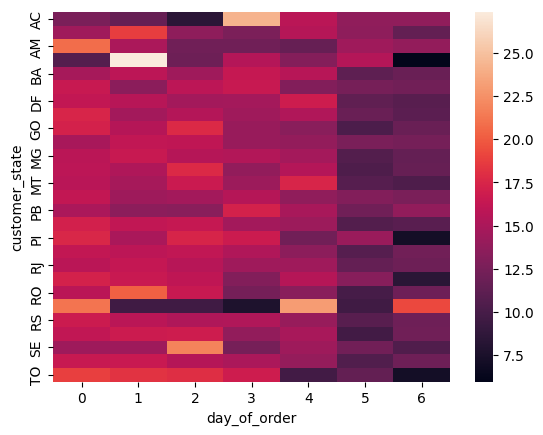

In [95]:
import seaborn as sns
sns.heatmap(state_weekday_sales)

# 20. Take the column "price". Are there any outliers in thies field?


In [ ]:
# write your code here

<Axes: ylabel='price'>

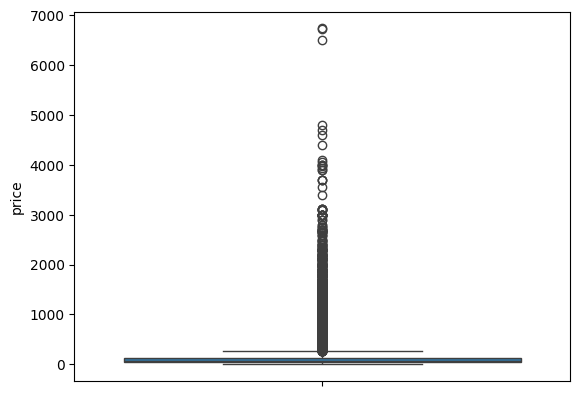

In [96]:
sns.boxplot(y=df_full['price'])

In [97]:
df_full2.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'product_category',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'review_length', 'day_of_order', 'cust_geolocation_lat',
       'cust_geolocation_lng', 'se

# 21. Show the region wise sales o map. use cust_geolocation_lat cust geoloction_lng for location and payment_value for display of values

In [98]:
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=go.Scattergeo(
    lon=df_full2['cust_geolocation_lng'],
    lat=df_full2['cust_geolocation_lat'],
    text=df_full2['payment_value'],
    marker_color=df_full2['payment_value']
))

fig.update_layout(
    title='sales by location'
)
fig.show()

# 22. Go to seller_city column. if the seller_city contains "rio" then change the seller_city to "Rio_ind"

In [101]:
df_full2["seller_city"].value_counts()

seller_city
sao paulo                                   29294
ibitinga                                     8375
curitiba                                     3161
santo andre                                  3149
sao jose do rio preto                        2693
                                            ...  
cordilheira alta                                1
novo hamburgo, rio grande do sul, brasil        1
eusebio                                         1
sapiranga                                       1
pirassununga                                    1
Name: count, Length: 611, dtype: int64

In [102]:
mask=df_full2["seller_city"].str.contains("rio",na=False)
df_full2["seller_city"][mask]="Rio_ind"

/tmp/ipython-input-2562450716.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [103]:
df_full2["seller_city"].value_counts()

seller_city
sao paulo                  29294
ibitinga                    8375
Rio_ind                     6142
curitiba                    3161
santo andre                 3149
                           ...  
sao paulo sp                   1
barbacena/ minas gerais        1
nhandeara                      1
eusebio                        1
pirassununga                   1
Name: count, Length: 587, dtype: int64

# 23. Find the number of days differnce between customer deliver date and purchase date

In [105]:
df_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [107]:
df_full2["order_delivered_customer_date"]-df_full2["order_purchase_timestamp"]

0         8 days 10:28:40
1         8 days 10:28:40
2         8 days 10:28:40
3        13 days 18:46:08
4         9 days 09:27:40
               ...       
119146   22 days 04:38:58
119147   24 days 20:37:34
119148   17 days 02:04:27
119149   17 days 02:04:27
119150    7 days 16:11:00
Length: 119151, dtype: timedelta64[ns]

# 24. Find the number of hours differnce between deliver date estimate delivery date. store it in a new column called hours of delay. create a histogram for hours of delay

In [108]:
df_full2[["order_delivered_customer_date","order_estimated_delivery_date","order_purchase_timestamp"]]

order_delivered_customer_date order_estimated_delivery_date  \
0                2017-10-10 21:25:13                    2017-10-18   
1                2017-10-10 21:25:13                    2017-10-18   
2                2017-10-10 21:25:13                    2017-10-18   
3                2018-08-07 15:27:45                    2018-08-13   
4                2018-08-17 18:06:29                    2018-09-04   
...                              ...                           ...   
119146           2018-02-28 17:37:56                    2018-03-02   
119147           2017-09-21 11:24:17                    2017-09-27   
119148           2018-01-25 23:32:54                    2018-02-15   
119149           2018-01-25 23:32:54                    2018-02-15   
119150           2018-03-16 13:08:30                    2018-04-03   

       order_purchase_timestamp  
0           2017-10-02 10:56:33  
1           2017-10-02 10:56:33  
2           2017-10-02 10:56:33  
3           2018-07-24 20:41:37  
4           2018-08-08 08:38:49  
...                         ...  
119146      2018-02-06 12:58:58  
119147      2017-08-27 14:46:43  
119148      2018-01-08 21:28:27  
119149      2018-01-08 21:28:27  
119150      2018-03-08 20:57:30  

[119151 rows x 3 columns]

In [115]:
from datetime import timedelta
(df_full2["order_delivered_customer_date"]-df_full2["order_estimated_delivery_date"])/timedelta(hours=1)


0        -170.579722
1        -170.579722
2        -170.579722
3        -128.537500
4        -413.891944
             ...    
119146    -30.367778
119147   -132.595278
119148   -480.451667
119149   -480.451667
119150   -418.858333
Length: 119151, dtype: float64

In [116]:
df_full2["hours_of_delay"]=(df_full2["order_estimated_delivery_date"]-df_full2["order_delivered_customer_date"])/timedelta(hours=1)

In [117]:
import plotly.express as px
fig = px.histogram(df_full2,x="hours_of_delay",title='Distribution of hours_of_delay' ,color_discrete_sequence=['darkseagreen'])
fig.update_layout(title_x=0.5)
fig.show()

In [118]:
dir()

['In',
 'Out',
 '_',
 '_10',
 '_100',
 '_101',
 '_103',
 '_105',
 '_107',
 '_108',
 '_109',
 '_110',
 '_112',
 '_113',
 '_114',
 '_115',
 '_12',
 '_14',
 '_15',
 '_16',
 '_18',
 '_21',
 '_22',
 '_23',
 '_32',
 '_34',
 '_35',
 '_36',
 '_37',
 '_38',
 '_40',
 '_41',
 '_50',
 '_51',
 '_52',
 '_53',
 '_54',
 '_55',
 '_57',
 '_59',
 '_6',
 '_60',
 '_61',
 '_62',
 '_64',
 '_65',
 '_67',
 '_68',
 '_69',
 '_7',
 '_71',
 '_72',
 '_73',
 '_8',
 '_85',
 '_86',
 '_89',
 '_9',
 '_90',
 '_91',
 '_92',
 '_93',
 '_94',
 '_95',
 '_96',
 '_97',
 '_99',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i100',
 '_i101',
 '_i102',
 '_i103',
 '_i104',
 '_i105',
 '_i106',
 '_i107',
 '_i108',
 '_i109',
 '_i11',
 '_i110',
 '_i111',
 '_i112',
 '_i113',
 '_i114',
 '_i115',
 '_i116',
 '_i117',
 '_i118',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21'